# Raumluftqualität 4.0

In belüfteten Räumen ändert sich die Schadstoffkonzentration nach der Funktion

$$
  k(t) = k_\infty + (k_0-k_\infty)\,{\rm e}^{-\beta\,(t-t_0)}
$$

Wird in diese Formel für $t$ der Wert $t_0$ eingesetzt, so ergibt sich

$$
  k(t_0) = k_\infty + (k_0-k_\infty)\,\underbrace{{\rm e}^{-\beta\,(t-t_0)}}_{=\,1} = k_0
$$

Weiter ergibt sich für sehr große Werte von $t$ (und schließlich für $t\to\infty$):

$$
  k(t) \to k_\infty + (k_0-k_\infty)\,\underbrace{{\rm e}^{-\beta\,(t-t_0)}}_{=\,0} = k_\infty
$$

Der Wert der Funktion $k(t)$ ändert sich also vom Ausgangswert $k_0$ auf den Endwert $k_\infty$. Dieser Wert wird theoretisch nie erreicht. Praktisch ist schon nach relativ kurzer Zeit kaum noch ein Unterschied zwischen $k(t)$ und $k_\infty$ festzustellen. Deshalb wird der Wert $k_\infty$ so bestimmt, dass er mit der zulässigen Schadstoffkonzentration im Raum zusammenfällt.

Dieser Wert ergab sich aus der Formel

$$
  k_{\rm zul} = k_\infty = k_{au} + \dfrac{\dot V_{\rm sch}}{\dot V_\rm{au}}
  \quad\text{oder}\quad
  \dot V_\rm{au} = \dfrac{\dot V_\rm{sch}}{k_\rm{zul} - k_\rm{au}}
$$

## Beispiel 1

Ein Raum hat eine Grundfläche von $35\,\rm{m}^2$ bei einer Geschosshöhe von $2.50\,{\rm m}$. Im Raum werden $50\,\rm\dfrac{\ell}{h}$ CO_2 freigesetzt. Die CO_2-Konzentration der Außenluft ist 400 ppM. Im Raum sollen 1000 ppM nicht überschritten werden.

- Berechnen Sie den erforderlichen Außenluftvolumenstrom.
- Stellen Sie den zeitlichen Verlauf der CO_2-Konzentration in einem Diagramm dar.

### Lösung

Das Raumvolumen ergibt sich zu $V_\rm{ra}= 87.5\,\rm{m}^3$. Damit ergibt sich der Außenluftvolumenstrom zu

$$
  \dot V_\rm{au} = \dfrac{\dot V_\rm{sch}}{k_\rm{zul}-k_\rm{au}}
  = \dfrac{50\cdot 10^{-3}\,\rm{m}^3}{(1000-400)\cdot 10^{-6}\,\rm{h}}
  = 83.3\,\rm\dfrac{m^3}{h}
$$

oder:

In [1]:
from matplotlib import pyplot as plt, ticker as tk
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
import pandas as pd

In [2]:
# Das Raumvolumen
V_ra = 35*2.5 # m**3
V_ra

87.5

In [3]:
# Der erforderliche Außenluftvolumenstrom
k_au = 400e-6
k_zul = 1000e-6

dV_sch = 50e-3 # m**3/h

dV_au = dV_sch/(k_zul-k_au) # m**3/h
dV_au

83.33333333333333

Die Luftwechselzahl ist 

$$
  \beta = \dfrac{\dot V_\rm{au}}{V_\rm{ra}} \approx 0.95 \rm\dfrac{1}{h}
$$

In [4]:
# Die Luftwechselzahl
beta = dV_au/V_ra
beta

0.9523809523809523

Damit ergibt sich der folgende Verlauf der Schadstoffkonzentration:

In [5]:
# Das Zeitintervall
lt = np.linspace(0,5/beta) # fünf Zeitkonstanten

# Der Dataframe
df = pd.DataFrame(
    {
        't': lt,
        'k': 1e6*(k_zul + (k_au-k_zul)*np.exp(-beta*lt))
    }
)
df.head().T

,0,1,2,3,4
t,0.0,0.107143,0.214286,0.321429,0.428571
k,400.0,458.204384,510.762517,558.222127,601.077808


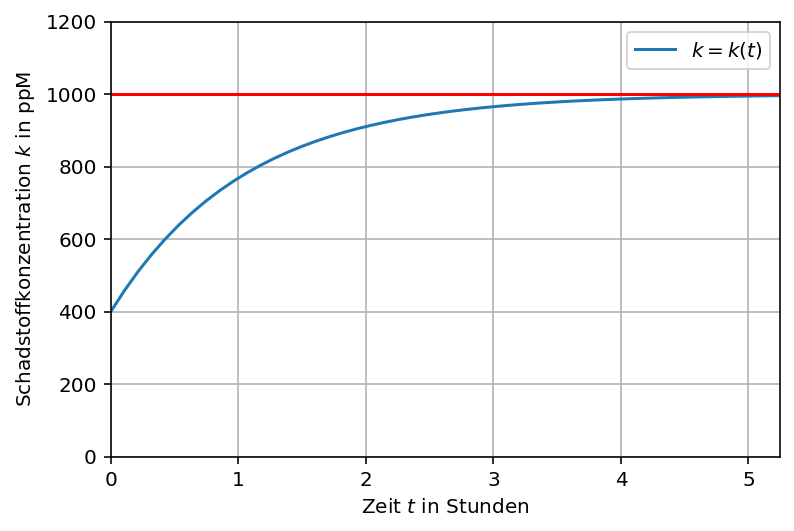

In [6]:
ax = df.plot(x='t',y='k',label='$k=k(t)$')
ax.axhline(1e6*k_zul,c='r')

ax.grid()

ax.set(
    xlim=(0,5/beta), xlabel='Zeit $t$ in Stunden',
    ylim=(0,1200), ylabel='Schadstoffkonzentration $k$ in ppM'
);

Bei korrekter Belüftung stellt sich nach einiger Zeit ein Gleichgewicht zwischen dem freigesetzten CO_2 und dem abtransportierten CO_2 ein, so dass sich die CO_2-Konzentration nicht mehr ändert.

## Beispiel 2

In einem schlecht gelüfteten Raum ist die CO_2-Konzentration auf 2000 ppM angewachsen. 

Weiter ist $\dot V_\rm{sch}=60\rm\dfrac{\ell}{h}$ bei $V_\rm{ra}=40\,\rm{m}^3$, sowie $k_\rm{au} = 400\,\rm{ppM}$ und $k_\rm{zul} = 1000\,\rm{ppM}$.

Mit welchem Außenluftvolumenstrom muss der Raum belüftet werden?

#### Lösung

Man berechnet

$$
  \dot V_\rm{au} = \dfrac{\dot V_\rm{sch}}{k_\rm{zul}-k_\rm{au}} = 100\,\rm\dfrac{m^3}{h}
$$

In [7]:
# Der Schadstoffvolumenstrom
dV_sch = 60e-3 # m**3/h

# Das Raumvolumen
V_ra = 50 # m**3

# Die CO_2-Konzentrationen
k_au = 400e-6
k_zul = 1000e-6
k_0 = 2000e-6

# Der Außenluftvolumenstrom
dV_au = dV_sch/(k_zul-k_au)
dV_au

99.99999999999999

Damit ist die Luftwechselzahl

$$
  \beta = \dfrac{\dot V_\rm{au}}{V_\rm{ra}} = 2\,\rm\dfrac{1}{h}
$$

In [8]:
# Die Luftwechselzahl des Raumes
beta = dV_au/V_ra # 1/h
beta

1.9999999999999998

Damit ergibt sich der folgende Verlauf der CO_2-Konzentration:

In [9]:
# Das Zeitintervall
lt = np.linspace(0,5/beta) # fünf Zeitkonstanten

# Der Dataframe
df = pd.DataFrame(
    {
        't': lt,
        'k': 1e6*(k_zul + (k_0-k_zul)*np.exp(-beta*lt)) # in ppM
    }
)

df.head().T

,0,1,2,3,4
t,0.0,0.051020,0.102041,0.153061,0.204082
k,2000.0,1902.992694,1815.395806,1736.296455,1664.870320


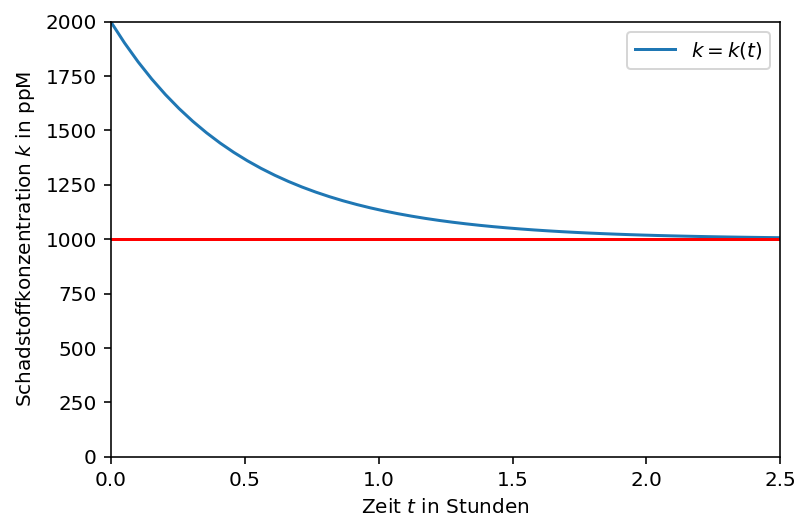

In [10]:
ax = df.plot(x='t',y='k',label='$k=k(t)$')
ax.axhline(1e6*k_zul,c='r')

ax.set(
    xlim=(0,5/beta),xlabel='Zeit $t$ in Stunden',
    ylim=(0,2000),ylabel='Schadstoffkonzentration $k$ in ppM'
);

Wird der Raum mit dem erforderlichen Außenluftvolumenstrom belüftet, so verbessert sich die schlechte Luftqualität und es stellt sich schließlich die zulässige Schadstoffkonzentration im Raum ein.

## Beispiel 3

Ein Wohnzimmer von $35\,\rm m^2$ Grundfläche wird mit $50\,\rm\dfrac{m^3}{h}$ Außenluft belüftet.

Abends versammeln sich die Eltern und die vier Kinder im Wohnzimmer zum Fernsehen. Dabei geben sie $120\,\rm\dfrac{\ell}{h}$ CO_2 ab. Wie ist die zeitliche Entwicklung der CO_2-Konzentration im Raum?

#### Lösung

Bei einer -üblichen- Geschosshöhe von $2.50\,\rm m$ ist $V_\rm{ra} = 87.5\,\rm m^3$. Damit ergibt sich

$$
  \beta = \dfrac{\dot V_\rm{au}}{V_\rm{ra}} = 0.57\,\rm\dfrac{1}{h}
$$

Die Schadstoffkonzentration ergibt den folgenden Verlauf:

In [11]:
# Das Raumvolumen
V_ra = 35*2.5 # m**3
V_ra

87.5

In [12]:
# Der CO_2-Volumenstrom
dV_sch = 120e-3 # m**3/h

# Der Außenluftvolumenstrom
dV_au = 50 # m**3/h

# Die CO_2-Konzentrationen
k_au = 400e-6
k_0 = k_au
k_zul = 1000e-6
k_inf = k_au + dV_sch/dV_au

# Die Luftwechselzahl
beta = dV_au/V_ra # 1/h
beta

0.5714285714285714

In [13]:
# Das Zeitintervall
lt = np.linspace(0,4)

# Der Dataframe
df = pd.DataFrame(
    {
        't': lt,
        'k': 1e6*(k_inf + (k_0-k_inf)*np.exp(-beta*lt)) # in ppM
    }
)

df.head().T

,0,1,2,3,4
t,0.0,0.081633,0.163265,0.244898,0.326531
k,400.0,509.382328,613.779450,713.418572,808.516544


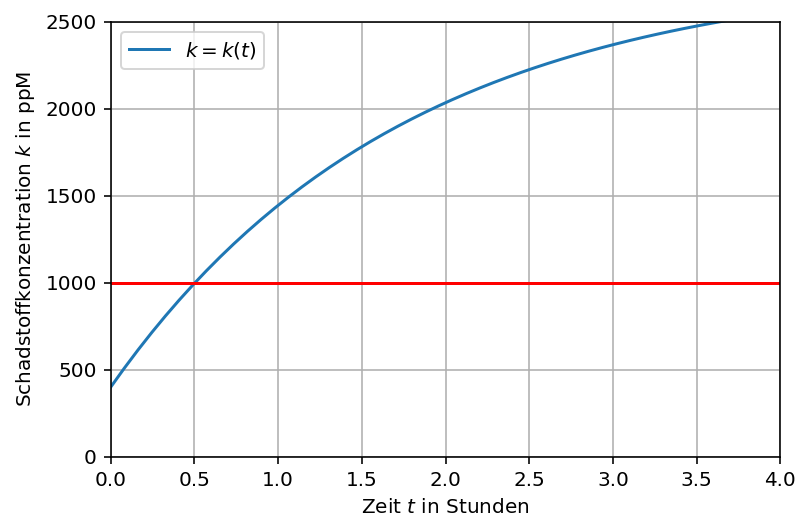

In [14]:
ax = df.plot(x='t',y='k',label='$k=k(t)$')
ax.axhline(1e6*k_zul,c='r')

ax.grid()

ax.set(
    xlim=(0,4), xlabel='Zeit $t$ in Stunden',
    ylim=(0,2500), ylabel='Schadstoffkonzentration $k$ in ppM'
);

Schon nach etwa einer halben Stunde ist die zulässige CO_2-Konzentration im Raum erreicht. Nach etwa 2 Stunden ist die Raumluftqualität inakzeptabel.